In [ ]:
"""
Three observations based on the data

1. Based on the scatter plot, there exists negative relationship between total number of rides per city and average fare per city,
indicating the more rides an city has, the lower the fare is on average. Meanwhile, the total number of rides per city have a 
positive relationship with the total number of drivers per city. 
2. Based on the scatter plot, the cities in urban areas have much larger number of rides and drivers but lower fare, compared to 
cities in suburban areas. Cities in rural areas have much smaller number of rides and drivers but higher fare than cities in urban
and suburban areas.
3. Based on the pie charts, the percentages of drivers in suburban (12.5%) and rural (0.8%) areas to total number of drivers 
are much smallers than the percentages of rides and fare in suburban (26.8% for rides and 30.5% for fare) and rural areas 
(5.0% for rides and 6.8% for fare) to total number of rides and fares. This indicates that the rural and suburban areas might 
experience  shortage of drivers, which could be the reasons for the lower total fare and rides compared to urban areas.

"""

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# read these two csv files
file1 = "../Pyber/city_data.csv"
file2 = "../Pyber/ride_data.csv"
city_df = pd.read_csv(file1, encoding="utf-8")
ride_df = pd.read_csv(file2, encoding="utf-8")

In [4]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [ ]:
'''
# The overall idea is 1) compute a dataframe for average fare per city from ride_df, 2) compute a 
dataframe for the total number of rides per city from ride_df, 3) combine the above two dataframes 
to one single dataframe based on key of "city", 4) combine the dataframe from 3) with original 
dataframe city_df to add the information of total number of drivers per city, and city type for a 
complete dataframe, 5) use the dataframe from 4) for the plot.
'''

In [6]:
# use groupby to compute average fare per city
avg_fare=ride_df.groupby("city",as_index=False)["fare"].mean()
avg_fare.head()

,city,fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [7]:
# use groupby to compute the total number of rides per city 
total_ride=ride_df.groupby("city",as_index=False)["ride_id"].count()
total_ride.head()

,city,ride_id
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [8]:
# merge the above two dataframes based on the "city" column
df1 = pd.merge(avg_fare,total_ride,on="city",how="outer")
df1.head()

,city,fare,ride_id
0,Amandaburgh,24.641667,18
1,Barajasview,25.332273,22
2,Barronchester,36.422500,16
3,Bethanyland,32.956111,18
4,Bradshawfurt,40.064000,10


In [9]:
# merge the above dataframe and the city_df
summary_df=pd.merge(df1,city_df,on="city",how="outer")
summary_df.head()

,city,fare,ride_id,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


In [10]:
# rename the column names
summary_df.columns=["city","avg_fare","num_rides","num_drivers","city_type"]
summary_df.head()

,city,avg_fare,num_rides,num_drivers,city_type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


In [ ]:
'''
In order to plot the relationships between the following four key variables:
- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type
A four-step process is conducted:
1. Create three sub dataframes, each representing one city type;
2. For each sub dataframe, scatter plot "total number of rides per city" as x-axis and "average fare 
per city"as y-axis, set the size of the marker represent the total number of drivers per city, and 
use one color to indicate one city type;
3. Put the scatter plots for three sub dataframes in on figure;
4. Add the legend, labels, and title;
'''

In [11]:
# create three sub dataframes based on different city types
df_urban = summary_df[summary_df["city_type"]=="Urban"]
df_suburban = summary_df[summary_df["city_type"]=="Suburban"]
df_rural = summary_df[summary_df["city_type"] == "Rural"]

<IPython.core.display.Javascript object>


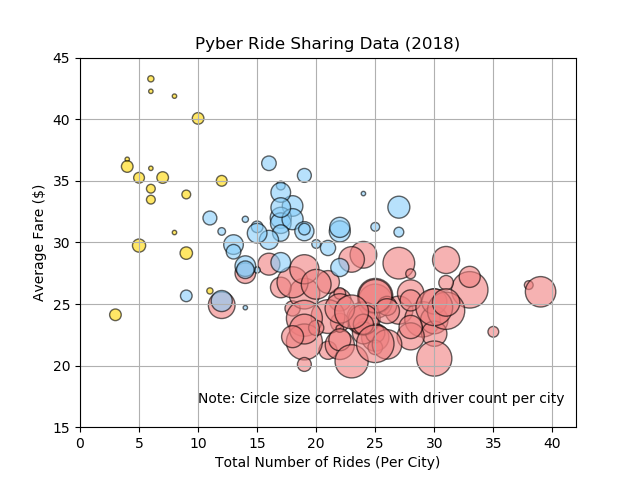

In [12]:
# Make the plot and use aesthetic features to represent the relationshisp between variables.
fig, ax = plt.subplots()
ax.scatter(x = df_urban["num_rides"], y=df_urban["avg_fare"], c="lightcoral", s=df_urban["num_drivers"]*10, label = "Urban", edgecolor="black", alpha=0.6)
ax.scatter(x = df_suburban["num_rides"], y=df_suburban["avg_fare"], c="lightskyblue", s=df_suburban["num_drivers"]*10, label = "Suburban", edgecolor="black", alpha=0.6)
ax.scatter(x = df_rural["num_rides"], y=df_rural["avg_fare"], c="gold", s=df_rural["num_drivers"]*10, label = "Rural", edgecolor="black", alpha=0.6)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlim(0, 42)
plt.ylim(15, 45)
plt.text(10, 17, "Note: Circle size correlates with driver count per city")
plt.grid()

In [55]:
# Add legend and fixed size of each point
lgnd=plt.legend(loc="best", scatterpoints=1, title="City Type")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

In [13]:
plt.savefig("Pyber Ride Sharing Data (2018)")
plt.show()

In [14]:
city_ride=pd.merge(city_df, ride_df, how="outer", on="city")
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [15]:
city_ride_df = city_ride.groupby("type", as_index=False).sum()

In [16]:
city_ride_df.columns = ["city_type","total_drivers","total_fares", "total_rides"]
city_ride_df.head()

,city_type,total_drivers,total_fares,total_rides
0,Rural,537,4327.93,580968240341287
1,Suburban,8570,19356.33,3106884522576766
2,Urban,59602,39854.38,7919412664056093


In [17]:
colors=["gold","lightskyblue","lightcoral"]
explode=(0,0,0.1)

<IPython.core.display.Javascript object>


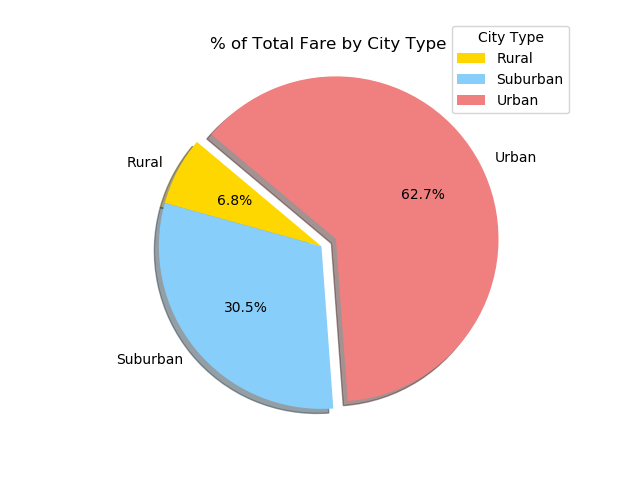

In [18]:
city_ride_df.plot(kind="pie",y="total_fares",explode=explode,labels=city_ride_df["city_type"],colors=colors,autopct="%1.1f%%",
                  shadow=True,startangle=140)
plt.axis("equal")
plt.title("% of Total Fare by City Type")
plt.ylabel("")
plt.legend(bbox_to_anchor=(0., 0.83, 1., .102), loc=4, title="City Type")

In [109]:
plt.savefig("% of Total Fares by City Type")
plt.show()

<IPython.core.display.Javascript object>


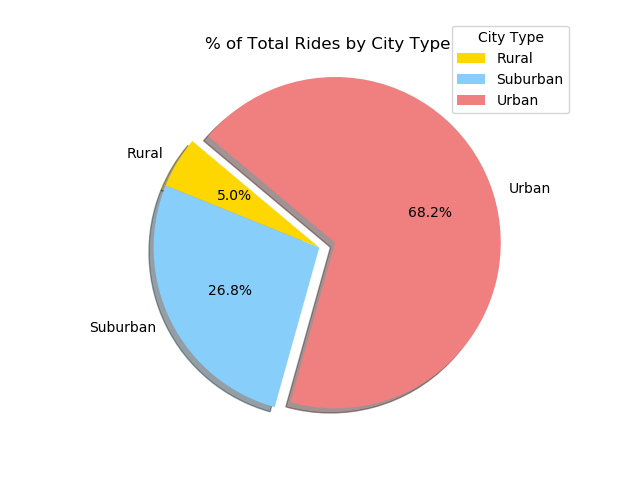

In [19]:
city_ride_df.plot(kind="pie",y="total_rides",explode=explode,labels=city_ride_df["city_type"],colors=colors,autopct="%1.1f%%",
                  shadow=True,startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.ylabel("")
plt.legend(bbox_to_anchor=(0., 0.83, 1., .102), loc=4, title="City Type")

In [106]:
plt.savefig("% of Total Rides by City Type")
plt.show()

<IPython.core.display.Javascript object>


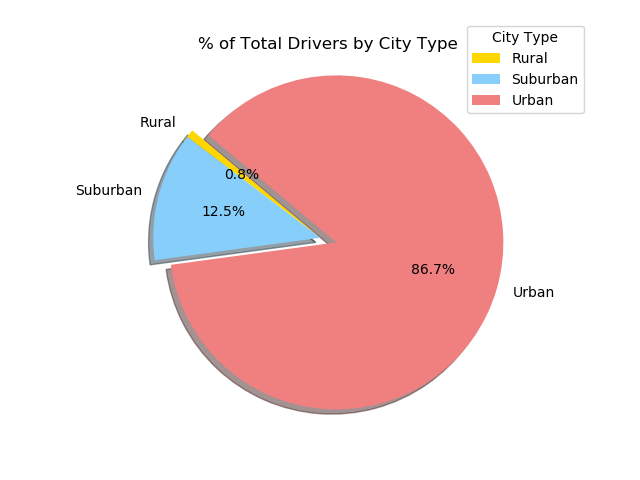

In [20]:
city_ride_df.plot(kind="pie",y="total_drivers",explode=explode,labels=city_ride_df["city_type"],colors=colors,autopct="%1.1f%%",
                  shadow=True,startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.ylabel("")
plt.legend(bbox_to_anchor=(0., 0.83, 1.03, .102), loc=4, title="City Type")

In [111]:
plt.savefig("% of Total Drivers by City Type")
plt.show()